In [17]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [8]:
weight = 0.3
bias = 0.9
X = torch.arange(0, 1, 0.01).unsqueeze(dim=1)
y = weight * X + bias 

In [11]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:] 

In [23]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True) 

        self.offset =  nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True) 

    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        return self.weights * x + self.offset 

In [22]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=12, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=12, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=12, label="Predictions")
  plt.xlim([0, 1])
  plt.ylim([0.5, 2])

  plt.xlabel("x")
  plt.ylabel("y")
  # Show the legend
  plt.legend(loc="best",prop={"size": 20});

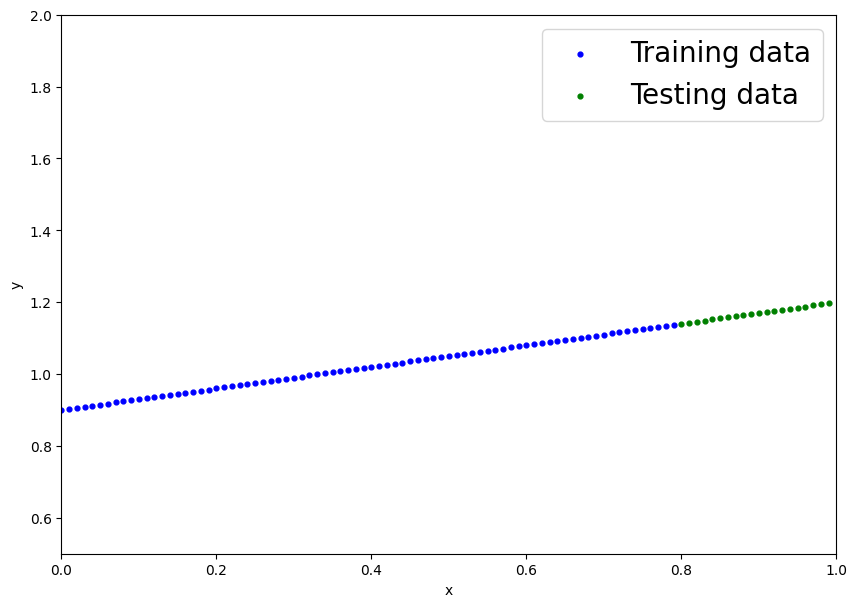

In [20]:
plot_predictions()

In [24]:
model = LinearRegressionModel()
model.state_dict()

OrderedDict([('weights', tensor([0.0808])), ('offset', tensor([-1.3148]))])

In [29]:
loss_func = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [32]:
# Set the number of epochs (how many times the model will pass over the training data)
epochs = 300

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_func(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_func(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 20 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 2.2782654762268066 | MAE Test Loss: 2.3703861236572266 
Epoch: 20 | MAE Train Loss: 2.047060489654541 | MAE Test Loss: 2.0996811389923096 
Epoch: 40 | MAE Train Loss: 1.8158557415008545 | MAE Test Loss: 1.8289763927459717 
Epoch: 60 | MAE Train Loss: 1.5846508741378784 | MAE Test Loss: 1.5582716464996338 
Epoch: 80 | MAE Train Loss: 1.3534462451934814 | MAE Test Loss: 1.2875667810440063 
Epoch: 100 | MAE Train Loss: 1.1222412586212158 | MAE Test Loss: 1.0168620347976685 
Epoch: 120 | MAE Train Loss: 0.891036331653595 | MAE Test Loss: 0.7461569309234619 
Epoch: 140 | MAE Train Loss: 0.6598312854766846 | MAE Test Loss: 0.4754520058631897 
Epoch: 160 | MAE Train Loss: 0.4286263585090637 | MAE Test Loss: 0.2047470062971115 
Epoch: 180 | MAE Train Loss: 0.19742152094841003 | MAE Test Loss: 0.06595785915851593 
Epoch: 200 | MAE Train Loss: 0.11586672067642212 | MAE Test Loss: 0.19528762996196747 
Epoch: 220 | MAE Train Loss: 0.10295961797237396 | MAE Test Loss: 0.2

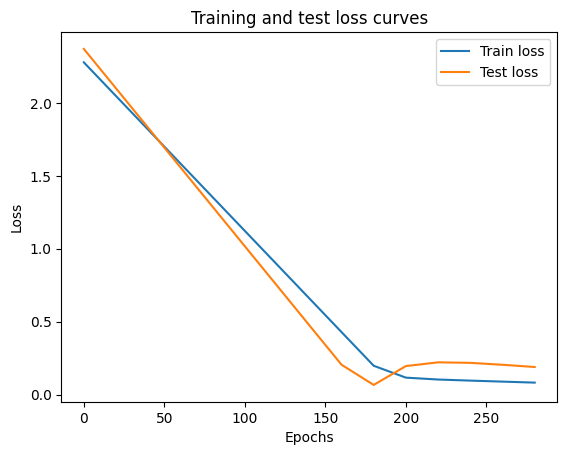

In [33]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

OrderedDict([('weights', tensor([0.6722])), ('offset', tensor([0.7412]))])

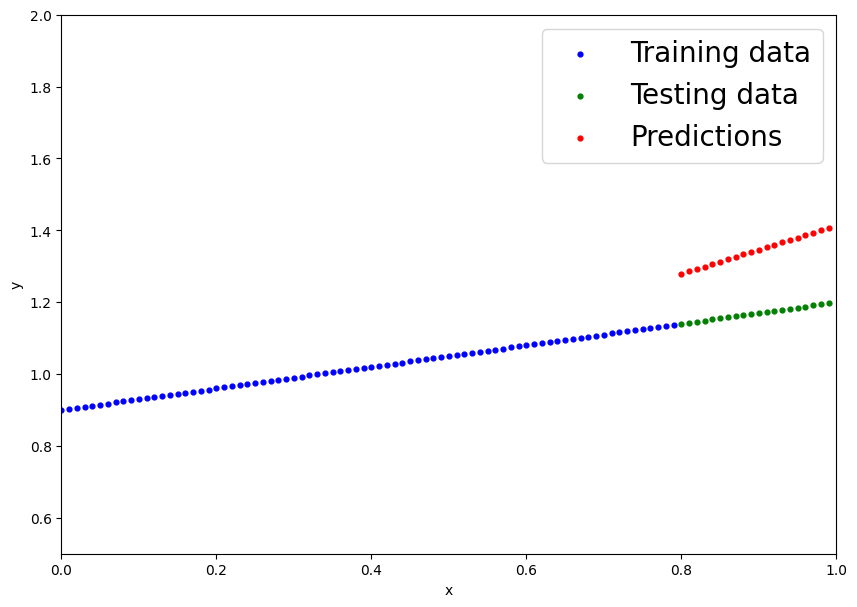

In [37]:
model.eval()
with torch.inference_mode():
    y_preds = model(X_test)
y_preds, y_preds - y_test
plot_predictions(predictions=y_preds)
model.state_dict()

In [39]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_linear_regression_mode.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH) 

Saving model to: models\01_linear_regression_mode.pth


In [41]:
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

OrderedDict([('weights', tensor([0.6722])), ('offset', tensor([0.7412]))])

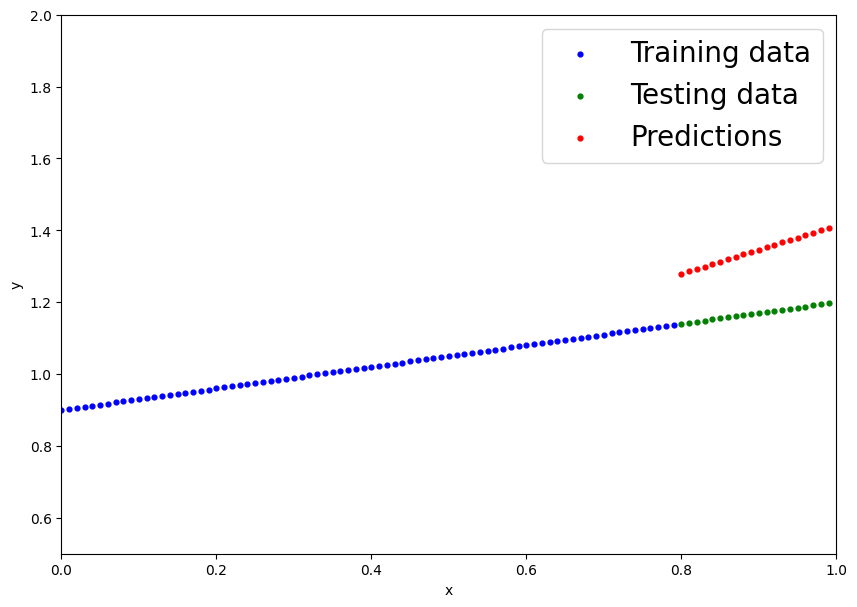

In [42]:
loaded_model.eval()
loaded_model.eval()
with torch.inference_mode():
    y_preds = loaded_model(X_test)
y_preds, y_preds - y_test
plot_predictions(predictions=y_preds)
loaded_model.state_dict()